In [1]:
#Heart Disease Prediction Using Logistic Regression
#World Health Organization has estimated that four out of five cardiovascular disease(CVD)
#deaths are due to heart attacks. This whole research intends to pinpoint the ratio of
#patients who possess a good chance of being affected by CVD and also to predict the
#overall risk using Logistic Regression.

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [3]:
#Reading the dataset
disease_df = pd.read_csv("framingham.csv") 
print(disease_df)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [4]:
#Removing unnessary columns
disease_df.drop(['education'], inplace = True, axis = 1) 
print(disease_df)

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4235     0   48              1        20.0     NaN                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1

In [5]:
#Renaming "male" column to "Sex_male"
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True) 
print(disease_df)

      Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0            1   39              0         0.0     0.0                0   
1            0   46              0         0.0     0.0                0   
2            1   48              1        20.0     0.0                0   
3            0   61              1        30.0     0.0                0   
4            0   46              1        23.0     0.0                0   
...        ...  ...            ...         ...     ...              ...   
4235         0   48              1        20.0     NaN                0   
4236         0   44              1        15.0     0.0                0   
4237         0   52              0         0.0     0.0                0   
4238         1   40              0         0.0     0.0                0   
4239         0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0        

In [6]:
#Removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
#Display the first 5 rows then represent the dimensions of the dataframe (rows, columns)
print(disease_df.head(), "\n" ,disease_df.shape)

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [7]:
#After accessing "TenYearCHD" column in the dataset, counts the occurrences of each unique value
#Not Affected = 0, Affected = 1
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


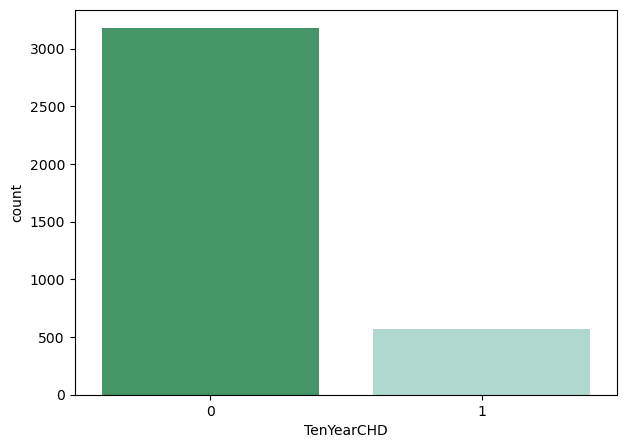

In [8]:
#Counting number of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', hue='TenYearCHD', data=disease_df, palette="BuGn_r", legend=False)
plt.show()

In [9]:
#Converts the selected DataFrame columns into a NumPy array
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

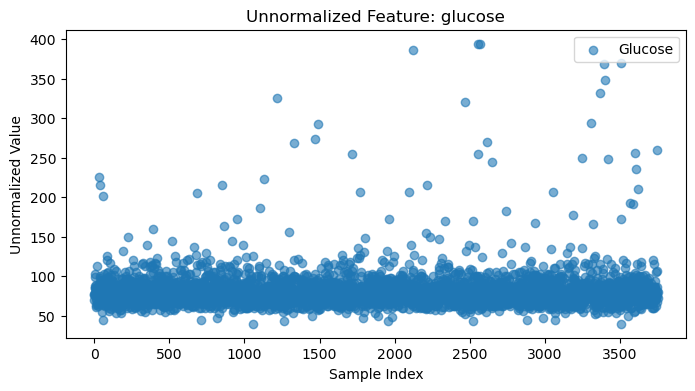

In [10]:
# Assuming X is a 2D array before normalization
plt.figure(figsize=(8, 4))

# Plot only the first feature (Feature 1)
plt.scatter(range(X.shape[0]), X[:, 5], label='Glucose', alpha=0.6)

plt.title('Unnormalized Feature: glucose')
plt.xlabel('Sample Index')
plt.ylabel('Unnormalized Value')
plt.legend()
plt.show()

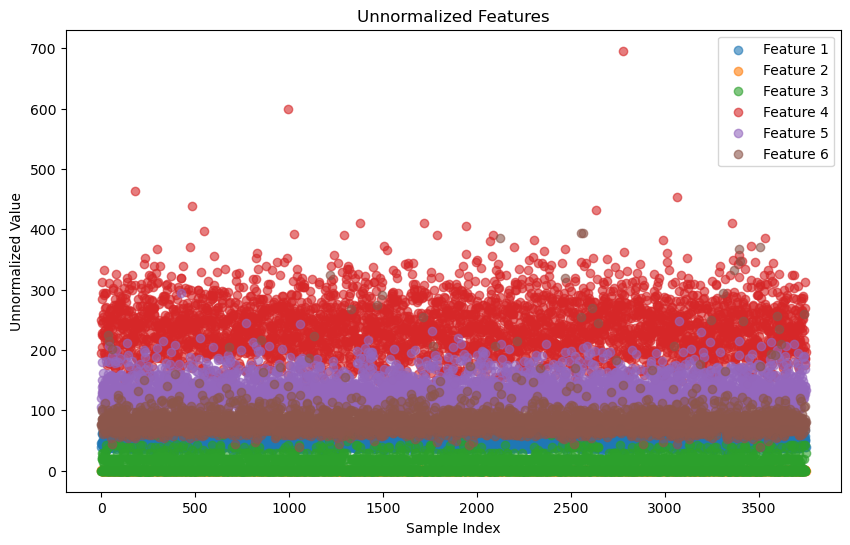

In [11]:
# Assuming X is a 2D array before normalization
plt.figure(figsize=(10, 6))

# Plot each feature as a scatter plot
for i in range(X.shape[1]):
    #For line representation
    #plt.plot(X[:, i], label=f'Feature {i+1}')
    #For dots representation
    plt.scatter(range(X.shape[0]), X[:, i], label=f'Feature {i+1}', alpha=0.6)

plt.title('Unnormalized Features')
plt.xlabel('Sample Index')
plt.ylabel('Unnormalized Value')
plt.legend()
plt.show()

In [12]:
#Normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

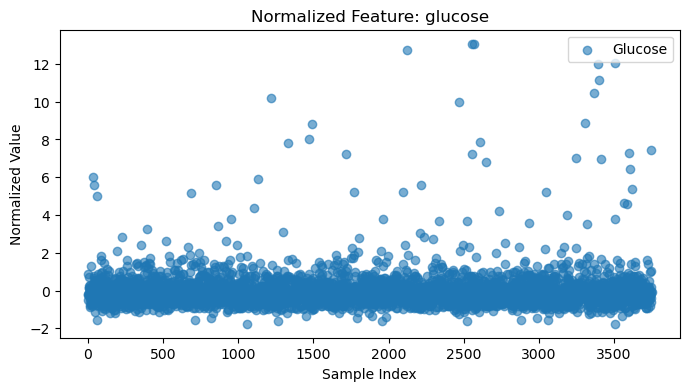

In [13]:
# Assuming X is a 2D array after normalization
plt.figure(figsize=(8, 4))

# Plot only the first feature (Feature 1)
plt.scatter(range(X.shape[0]), X[:, 5], label='Glucose', alpha=0.6)

plt.title('Normalized Feature: glucose')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

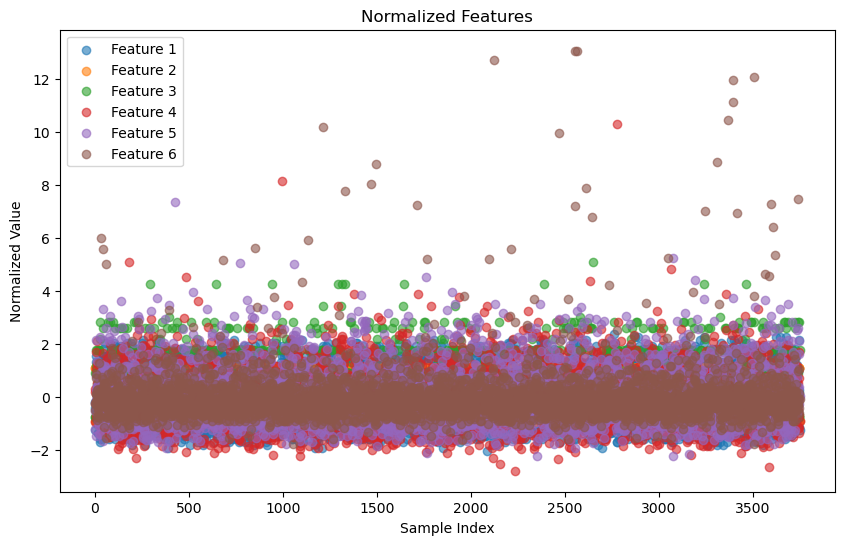

In [44]:
# Assuming X is a 2D array after normalization
plt.figure(figsize=(10, 6))

# Plot each feature as a scatter plot
for i in range(X.shape[1]):
    #For line representation
    #plt.plot(X[:, i], label=f'Feature {i+1}')
    #For dots representation
    plt.scatter(range(X.shape[0]), X[:, i], label=f'Feature {i+1}', alpha=0.6)

plt.title('Normalized Features')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

In [15]:
# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


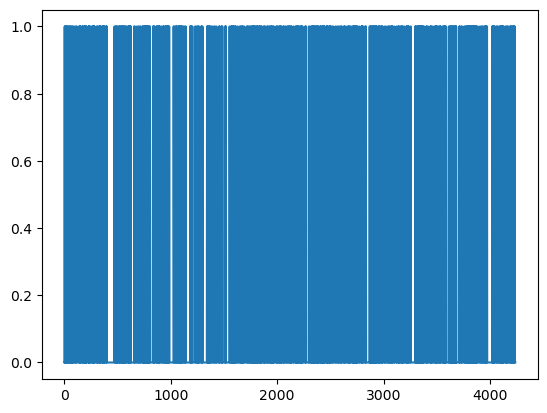

In [46]:
#Draw a blue vertical line for CHD-free people & white line for CVD patients
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [50]:
# Calling supervised logistic regression function to predict whether CHD-free or not
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [52]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8490230905861457


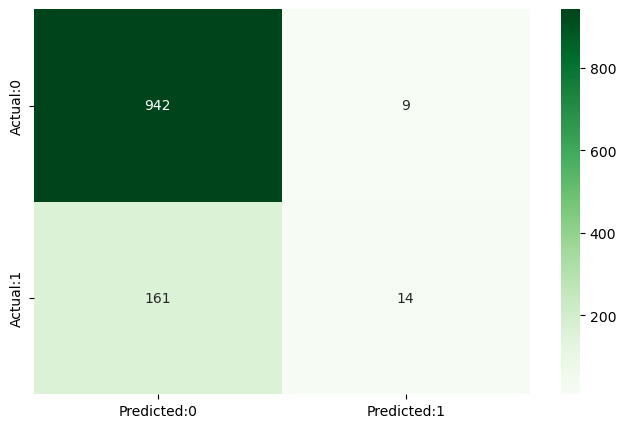

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [60]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
# True positive, true negative, false positive, and false negative predictions
#https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png?w=1200
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))